In [22]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [23]:
Data = pd.read_csv('Crop_recommendation.csv')
Data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [24]:
X = Data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].values
y = Data['label'].values

In [25]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [26]:
with open("label_encoder_crop.pickle", "wb") as file:
    pickle.dump(label_encoder, file)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
with open ("scaler.pickle", "wb") as file:
    pickle.dump(scaler, file)

In [30]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

d:\PYTHON\GENERATIVE AI\GENAI\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [37]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

Epoch 1/100


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0521 - loss: 3.0857 - val_accuracy: 0.1568 - val_loss: 2.8771
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1415 - loss: 2.8168 - val_accuracy: 0.2318 - val_loss: 2.4156
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2466 - loss: 2.3761 - val_accuracy: 0.3500 - val_loss: 1.8832
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3499 - loss: 1.9047 - val_accuracy: 0.6341 - val_loss: 1.4329
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4486 - loss: 1.5825 - val_accuracy: 0.6500 - val_loss: 1.0799
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5501 - loss: 1.3040 - val_accuracy: 0.7818 - val_loss: 0.8360
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6030 - loss: 1.1396 - val_accuracy: 0.7591 - val_loss: 0.6972
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6098 - loss: 1.0069 - val_accuracy: 0.8182 - val_loss: 0.5

In [38]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'\nTest accuracy: {test_accuracy:.4f}')


Test accuracy: 0.9727


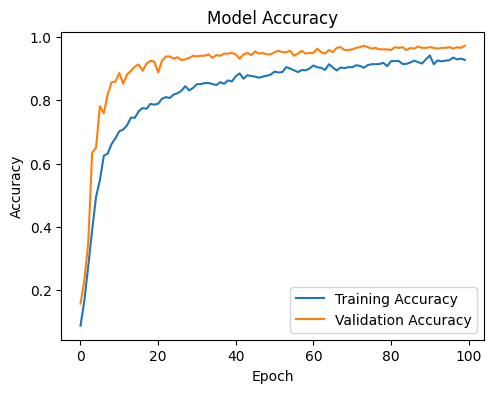

In [39]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

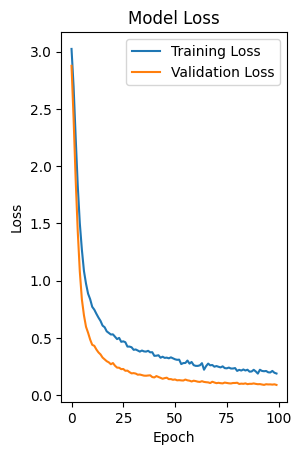

In [40]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [41]:
model.save('crop_predictor.h5')